# 0. Setup

In [239]:
import nilearn
import pandas as pd
import numpy as np
import os
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img 

from nilearn import plotting
from nilearn import connectome
from nilearn import datasets
from nilearn import image
from nilearn import datasets

from nilearn.regions import connected_label_regions

from nilearn.image import concat_imgs, mean_img, load_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map


In [312]:
# Set the path to the data directory
# Set the path to the data directory
src_dir = "../data"
part_id = 'sub-10'
ses_id = 'ses-01'
print(os.getcwd())



c:\Users\sebas\OneDrive\Documentos\GitHub\MusicBrainNetwork\scripts_seb


In [313]:
data_dir = os.path.join(src_dir, part_id, ses_id)

In [314]:
anat_path = os.path.join(src_dir, part_id, ses_id, 'anat')

anat_runs = os.listdir(anat_path) 

file_paths_anat = [f for f in anat_runs if f.endswith('nii.gz')]


In [315]:
print(file_paths_anat)

['sub-10_ses-01_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'sub-10_ses-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz']


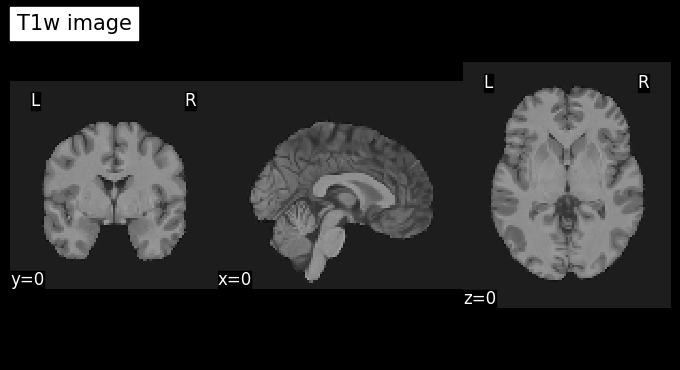

In [316]:
image_info = file_paths_anat[1].split('_')[-1].split('.')[0] #Splits between the last _ and the .
    
plot_anat(os.path.join(anat_path,file_paths_anat[1]), title=image_info + " image", draw_cross=False, display_mode='ortho', cut_coords=(0, 0, 0))

In [317]:
funcdir_path = os.path.join(src_dir, part_id, ses_id, 'func')

func_runs = os.listdir(funcdir_path)

func_runs = [f for f in func_runs if f.endswith('bold.nii.gz')]

func_runs.sort()

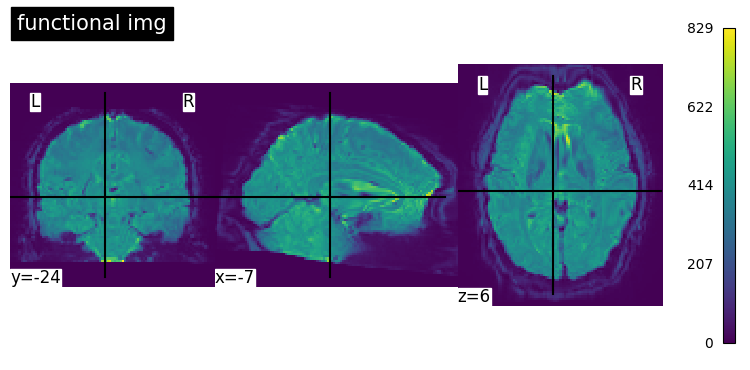

In [318]:
func_image = image.load_img(os.path.join(funcdir_path, func_runs[0]))

mean_func_img = mean_img(func_image)

plot_img(mean_func_img, title="functional img", colorbar=True, cbar_tick_format="%i")

# 1. Load Mask / atlas / meta

### Yeo Atlas

In [319]:
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
atlas_yeo = atlas_yeo_2011.thick_17
# labels_yeo = atlas_yeo.labels


In [320]:
region_labels_yeo = connected_label_regions(atlas_yeo)

In [321]:

atlas_yeo_2011.description



"Yeo 2011 Atlas\n\n\nNotes\n-----\nThis atlas provides a labeling of some cortical voxels in the MNI152\nspace.\n\nFour versions of the atlas are available, according to the cortical\nmodel (thick or thin cortical surface) and to the number of regions\nconsidered (7 or 17).\n\nContent\n-------\n    :'anat': Background anatomical image for reference and visualization\n    :'thin_7': Cortical parcelation into 7 regions, thin cortical model\n    :'thin_17': Cortical parcelation into 17 regions, thin cortical model\n    :'thick_7': Cortical parcelation into 17 regions, thick cortical model\n    :'thick_17': Cortical parcelation into 17 regions, thick cortical model\n    :'colors_7': Text file for the coloring of 7-regions parcellation\n    :'colors_17': Text file for the coloring of 17-regions parcellation\n\n\nReferences\n----------\nFor more information on this dataset's structure, see\nhttp://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation_Yeo2011\n\nYeo BT, Krienen FM, Sepulcre 

In [322]:
print(region_labels_yeo)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 256)
affine:
[[  -1.    0.    0.  127.]
 [   0.    0.    1. -145.]
 [   0.   -1.    0.  147.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code     

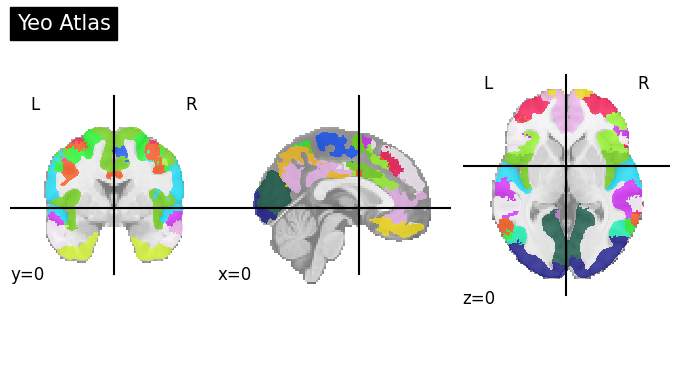

In [323]:
#plotting yeo-atlas

plotting.plot_roi(atlas_yeo, title="Yeo Atlas", display_mode='ortho', cut_coords=(0, 0, 0))

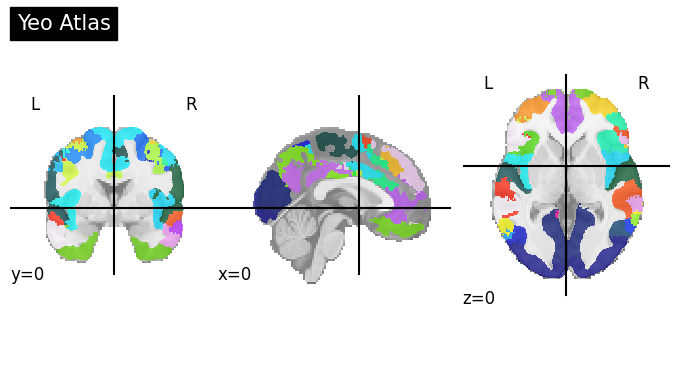

In [324]:
plotting.plot_roi(region_labels_yeo, title="Yeo Atlas", display_mode='ortho', cut_coords=(0, 0, 0))

### Harvard-Oxford Atlas

In [325]:
atlas_ho= datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr50-2mm')
atlas_ho_filename = atlas_ho.maps
labels_ho = atlas_ho.labels
number_of_regions_ho = len(labels_ho[1:])

In [326]:
print(atlas_ho)
print(labels_ho)
print(atlas_ho_filename)

{'filename': 'C:\\Users\\sebas/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr50-2mm.nii.gz', 'maps': <nibabel.nifti1.Nifti1Image object at 0x000001D63FF55F70>, 'labels': ['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', '

In [327]:
region_labels_ho=connected_label_regions(atlas_ho_filename)

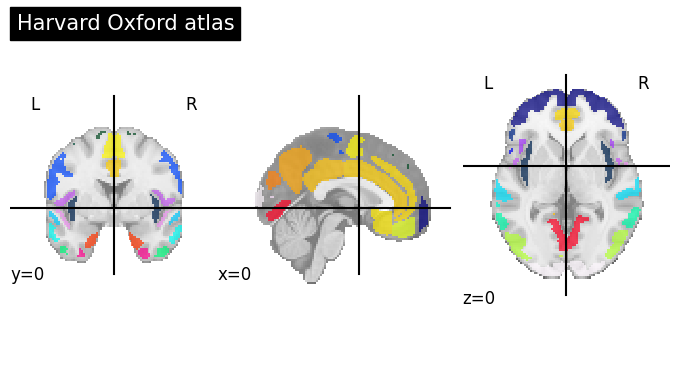

In [328]:
#plot do havard-ocford atlas
plotting.plot_roi(atlas_ho_filename, cut_coords=(0,0,0), title="Harvard Oxford atlas")

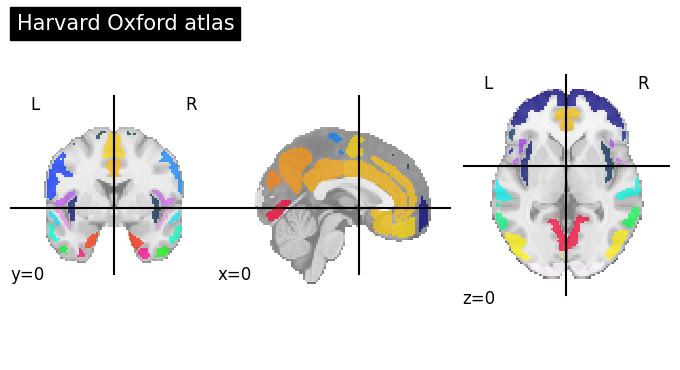

In [329]:
plotting.plot_roi(region_labels_ho, title="Harvard Oxford atlas", display_mode='ortho', cut_coords=(0, 0, 0))

# 2. Extract timecourses per ROI / block

In [330]:
masker = NiftiLabelsMasker(labels_img=atlas_ho_filename, 
                           standardize="zscore_sample", 
                           standardize_confounds="zscore_sample",
                            memory='nilearn_cache')

In [331]:
fdir_events = [file for file in os.listdir(funcdir_path) if file.endswith('.tsv')]

f_events = [os.path.join(funcdir_path, f) for f in fdir_events]

f_events.sort()

f_events

['../data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-1_events.tsv',
 '../data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-2_events.tsv',
 '../data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-3_events.tsv',
 '../data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-4_events.tsv']

In [332]:
for fn in f_events:
    # Load the events.tsv file
    events = pd.read_table(fn)

    # Get the file name
    events_info = os.path.basename(fn)

    # Print the image information
    print(events_info) 
    
    # pd.read_table function is used to read a general delimited file into a pandas DataFrame
    print(events) 

sub-10_ses-01_task-02a_run-1_events.tsv
     onset  duration        trial_type
0     0.00     12.27   Noise_ToDiscard
1    12.27     23.96     Transcendence
2    36.23      6.00   Noise_InterSong
3    42.23     24.08     Transcendence
4    66.31     17.94             Noise
5    84.25     24.09  JoyfulActivation
6   108.35      5.90   Noise_InterSong
7   114.25     24.00  JoyfulActivation
8   138.25     17.99             Noise
9   156.23     24.18      Peacefulness
10  180.42      5.83   Noise_InterSong
11  186.25     24.11      Peacefulness
12  210.35     17.95             Noise
13  228.30     23.95         Nostalgia
14  252.25      5.99   Noise_InterSong
15  258.24     24.14         Nostalgia
16  282.38     17.87             Noise
17  300.25     24.06           Tension
18  324.31      5.99   Noise_InterSong
19  330.31     23.95           Tension
20  354.25     18.00             Noise
21  372.25     24.00           Sadness
22  396.26      6.00   Noise_InterSong
23  402.26     24.06    

In [333]:
run_id = 0
idx = 0


target_set = {}
group_set = {}
onset_set = {}
duration_set = {}

partial_correlation_matrix = {}

offset_st = 4 # offset for the onset time
offset_end = 2 # offset for the end block time

# Compute the correlation matrix and store it in the partial correlation matrix as a 4D array
conn_measure = connectome.ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)

# intialize 2D array to store the partial correlation matrix 

# for each events file 
for fn in f_events:

    print(os.path.join(funcdir_path,func_runs[run_id]), fn)
    
    # Load the events.tsv file
    events = pd.read_table(fn)

    # Load the corresponding functional image
    func_image = image.load_img(os.path.join(funcdir_path,func_runs[run_id]))

    # extract time course from functional image
    time_series = masker.fit_transform(func_image)

    # create one image per event 
    for i, row in events.iterrows():

        # Print the row information
        print(row) 

        # Extract the onset time
        onset = np.round(row['onset'])

        # Extract the duration
        duration = np.round(row['duration'])

        # Extract the trial_type
        trial_type = row['trial_type']

        # Print the row information
        print(onset, duration, trial_type) 

        # if duration greater than 10
        if duration > 10 and onset + duration + offset_end < 660 and trial_type != 'Noise':

            # create mean_img based on i_idxs

            target_set[idx] = trial_type
            group_set[idx] = run_id
            duration_set[idx] = duration - offset_st + offset_end

            event_time_series = time_series[int(onset):int(onset + duration), :]

            temp_correlation_matrix = conn_measure.fit_transform([event_time_series])[0]

            partial_correlation_matrix[idx] = temp_correlation_matrix.flatten()

            idx += 1


    run_id += 1

../data\sub-10\ses-01\func\sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz ../data\sub-10\ses-01\func\sub-10_ses-01_task-02a_run-1_events.tsv


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:594: UserWarning: Persisting input arguments took 8.36s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  region_signals, labels_ = self._cache(


onset                     0.0
duration                12.27
trial_type    Noise_ToDiscard
Name: 0, dtype: object
0.0 12.0 Noise_ToDiscard
onset                 12.27
duration              23.96
trial_type    Transcendence
Name: 1, dtype: object
12.0 24.0 Transcendence
onset                   36.23
duration                  6.0
trial_type    Noise_InterSong
Name: 2, dtype: object
36.0 6.0 Noise_InterSong
onset                 42.23
duration              24.08
trial_type    Transcendence
Name: 3, dtype: object
42.0 24.0 Transcendence
onset         66.31
duration      17.94
trial_type    Noise
Name: 4, dtype: object
66.0 18.0 Noise
onset                    84.25
duration                 24.09
trial_type    JoyfulActivation
Name: 5, dtype: object
84.0 24.0 JoyfulActivation
onset                  108.35
duration                  5.9
trial_type    Noise_InterSong
Name: 6, dtype: object
108.0 6.0 Noise_InterSong
onset                   114.25
duration                  24.0
trial_type    Joyfu

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:594: UserWarning: Persisting input arguments took 8.40s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  region_signals, labels_ = self._cache(


onset                     0.0
duration                12.42
trial_type    Noise_ToDiscard
Name: 0, dtype: object
0.0 12.0 Noise_ToDiscard
onset                 12.42
duration              23.87
trial_type    Transcendence
Name: 1, dtype: object
12.0 24.0 Transcendence
onset                    36.3
duration                 5.94
trial_type    Noise_InterSong
Name: 2, dtype: object
36.0 6.0 Noise_InterSong
onset                 42.23
duration              24.07
trial_type    Transcendence
Name: 3, dtype: object
42.0 24.0 Transcendence
onset          66.3
duration      17.93
trial_type    Noise
Name: 4, dtype: object
66.0 18.0 Noise
onset                84.23
duration             24.15
trial_type    Peacefulness
Name: 5, dtype: object
84.0 24.0 Peacefulness
onset                  108.38
duration                 5.86
trial_type    Noise_InterSong
Name: 6, dtype: object
108.0 6.0 Noise_InterSong
onset               114.24
duration             24.08
trial_type    Peacefulness
Name: 7, dtype: 

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:594: UserWarning: Persisting input arguments took 8.46s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  region_signals, labels_ = self._cache(


onset                     0.0
duration                12.24
trial_type    Noise_ToDiscard
Name: 0, dtype: object
0.0 12.0 Noise_ToDiscard
onset           12.24
duration        24.06
trial_type    Tension
Name: 1, dtype: object
12.0 24.0 Tension
onset                    36.3
duration                 5.96
trial_type    Noise_InterSong
Name: 2, dtype: object
36.0 6.0 Noise_InterSong
onset           42.26
duration        24.08
trial_type    Tension
Name: 3, dtype: object
42.0 24.0 Tension
onset         66.35
duration      17.89
trial_type    Noise
Name: 4, dtype: object
66.0 18.0 Noise
onset          84.24
duration       24.09
trial_type    Wonder
Name: 5, dtype: object
84.0 24.0 Wonder
onset                  108.33
duration                 5.93
trial_type    Noise_InterSong
Name: 6, dtype: object
108.0 6.0 Noise_InterSong
onset         114.26
duration       23.98
trial_type    Wonder
Name: 7, dtype: object
114.0 24.0 Wonder
onset         138.24
duration        18.0
trial_type     Noise
Na

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:594: UserWarning: Persisting input arguments took 8.58s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  region_signals, labels_ = self._cache(


In [334]:
print(partial_correlation_matrix)


{0: array([1.        , 0.47286692, 0.43603108, ..., 0.14171208, 0.45502099,
       1.        ]), 1: array([1.        , 0.34961144, 0.66815126, ..., 0.22561043, 0.43007272,
       1.        ]), 2: array([1.        , 0.43796639, 0.5483352 , ..., 0.26012175, 0.54054307,
       1.        ]), 3: array([1.        , 0.44849666, 0.58347782, ..., 0.05818303, 0.37948171,
       1.        ]), 4: array([1.        , 0.49391991, 0.47809621, ..., 0.29893422, 0.47330214,
       1.        ]), 5: array([1.        , 0.34107083, 0.65984248, ..., 0.25994601, 0.54664568,
       1.        ]), 6: array([1.        , 0.59397407, 0.73541013, ..., 0.44381365, 0.62065952,
       1.        ]), 7: array([ 1.        ,  0.60459309,  0.69746107, ..., -0.05519366,
        0.43774429,  1.        ]), 8: array([1.        , 0.56130903, 0.62645853, ..., 0.33925824, 0.4927972 ,
       1.        ]), 9: array([1.        , 0.62024062, 0.678603  , ..., 0.23157435, 0.5450745 ,
       1.        ]), 10: array([ 1.        ,  0.494786

In [335]:
deriv_dir = os.path.join(src_dir, 'derivatives')
print(deriv_dir)

if not os.path.exists(deriv_dir):
    os.makedirs(deriv_dir)


results_dir = os.path.join(deriv_dir, 'fc_mvpa')

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

data_fldr= os.path.join(results_dir, part_id, ses_id)

# if the directory for the participant and session does not exist, create it
if not os.path.exists(data_fldr):
    os.makedirs(data_fldr)

../data\derivatives


In [336]:
pd.DataFrame(partial_correlation_matrix).T.to_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_correlation-matrix.csv'))

# Save the target_set to csv using pandas
pd.Series(target_set, name = 'target').to_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_targets.csv'))

# Save the group_set to csv using pandas
pd.Series(group_set, name = 'group').to_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_groups.csv'))


## 3.1 Visualize average results per emotion

In [337]:
deriv_dir = os.path.join(src_dir, 'derivatives')

results_dir = os.path.join(deriv_dir, 'fc_mvpa')

data_fldr= os.path.join(results_dir, part_id, ses_id)

In [338]:
partial_correlation_matrix = pd.read_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_correlation-matrix.csv')) #Clean beacuse it removed the noise (baseline)

# Load csv file with targets.
target_set = pd.read_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_targets.csv'))

# Load csv file with groups.
group_set = pd.read_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_groups.csv')) 

In [339]:
print(partial_correlation_matrix)

    Unnamed: 0    0         1         2         3         4         5  \
0            0  1.0  0.472867  0.436031  0.514384  0.538561  0.383304   
1            1  1.0  0.349611  0.668151  0.626731  0.602441  0.238092   
2            2  1.0  0.437966  0.548335  0.568625  0.320594  0.262169   
3            3  1.0  0.448497  0.583478  0.519315  0.397270  0.154706   
4            4  1.0  0.493920  0.478096  0.503723  0.400250  0.286006   
..         ...  ...       ...       ...       ...       ...       ...   
71          71  1.0  0.398384  0.519039  0.171393  0.237881  0.234724   
72          72  1.0  0.619738  0.658710  0.591666  0.267869  0.666599   
73          73  1.0  0.396131  0.694257  0.660639  0.212614  0.352581   
74          74  1.0  0.613916  0.725165  0.453658  0.278723  0.682547   
75          75  1.0  0.383359  0.609993  0.488121 -0.050637  0.373369   

           6         7         8  ...      2294      2295      2296      2297  \
0   0.361168  0.270609  0.238606  ...  0.5

In [340]:
print(target_set)

    Unnamed: 0            target
0            0   Noise_ToDiscard
1            1     Transcendence
2            2     Transcendence
3            3  JoyfulActivation
4            4  JoyfulActivation
..         ...               ...
71          71           Tension
72          72     Transcendence
73          73     Transcendence
74          74        Tenderness
75          75        Tenderness

[76 rows x 2 columns]


In [341]:
csv_path = os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_targets.csv')

# Read the CSV, setting the first column as the index
target_series = pd.read_csv(csv_path, index_col=0)

# If the CSV contains a column named 'target', extract that Series
if 'target' in target_series.columns:
    target_series = target_series['target']

# Convert the Series back to a dictionary
target_set = target_series.to_dict()

In [342]:
csv_path = os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_correlation-matrix.csv')

# Read the CSV, setting the first column as the index
df = pd.read_csv(csv_path, index_col=0)

# Option 1: Convert the DataFrame rows directly into a dictionary,
# where each key is the index and each value is a NumPy array of the row values.
partial_correlation_matrix = {int(idx): row.values.astype(float) for idx, row in df.iterrows()}

# (If your keys are not meant to be integers, you can simply do:
# partial_correlation_matrix = {idx: row.values.astype(float) for idx, row in df.iterrows()}
# )

# Now partial_correlation_matrix is a dictionary with keys corresponding to the
# 'Unnamed: 0' column in the CSV and values as the correlation data.
print(partial_correlation_matrix)

{0: array([1.        , 0.47286692, 0.43603108, ..., 0.14171208, 0.45502099,
       1.        ]), 1: array([1.        , 0.34961144, 0.66815126, ..., 0.22561043, 0.43007272,
       1.        ]), 2: array([1.        , 0.43796639, 0.5483352 , ..., 0.26012175, 0.54054307,
       1.        ]), 3: array([1.        , 0.44849666, 0.58347782, ..., 0.05818303, 0.37948171,
       1.        ]), 4: array([1.        , 0.49391991, 0.47809621, ..., 0.29893422, 0.47330214,
       1.        ]), 5: array([1.        , 0.34107083, 0.65984248, ..., 0.25994601, 0.54664568,
       1.        ]), 6: array([1.        , 0.59397407, 0.73541013, ..., 0.44381365, 0.62065952,
       1.        ]), 7: array([ 1.        ,  0.60459309,  0.69746107, ..., -0.05519366,
        0.43774429,  1.        ]), 8: array([1.        , 0.56130903, 0.62645853, ..., 0.33925824, 0.4927972 ,
       1.        ]), 9: array([1.        , 0.62024062, 0.678603  , ..., 0.23157435, 0.5450745 ,
       1.        ]), 10: array([ 1.        ,  0.494786

In [343]:
print(target_set)

{0: 'Noise_ToDiscard', 1: 'Transcendence', 2: 'Transcendence', 3: 'JoyfulActivation', 4: 'JoyfulActivation', 5: 'Peacefulness', 6: 'Peacefulness', 7: 'Nostalgia', 8: 'Nostalgia', 9: 'Tension', 10: 'Tension', 11: 'Sadness', 12: 'Sadness', 13: 'Tenderness', 14: 'Tenderness', 15: 'Wonder', 16: 'Wonder', 17: 'Power', 18: 'Power', 19: 'Noise_ToDiscard', 20: 'Transcendence', 21: 'Transcendence', 22: 'Peacefulness', 23: 'Peacefulness', 24: 'Wonder', 25: 'Wonder', 26: 'Sadness', 27: 'Sadness', 28: 'Power', 29: 'Power', 30: 'Tenderness', 31: 'Tenderness', 32: 'JoyfulActivation', 33: 'JoyfulActivation', 34: 'Tension', 35: 'Tension', 36: 'Nostalgia', 37: 'Nostalgia', 38: 'Noise_ToDiscard', 39: 'Tension', 40: 'Tension', 41: 'Wonder', 42: 'Wonder', 43: 'Tenderness', 44: 'Tenderness', 45: 'Nostalgia', 46: 'Nostalgia', 47: 'Sadness', 48: 'Sadness', 49: 'Power', 50: 'Power', 51: 'Peacefulness', 52: 'Peacefulness', 53: 'JoyfulActivation', 54: 'JoyfulActivation', 55: 'Transcendence', 56: 'Transcendence'

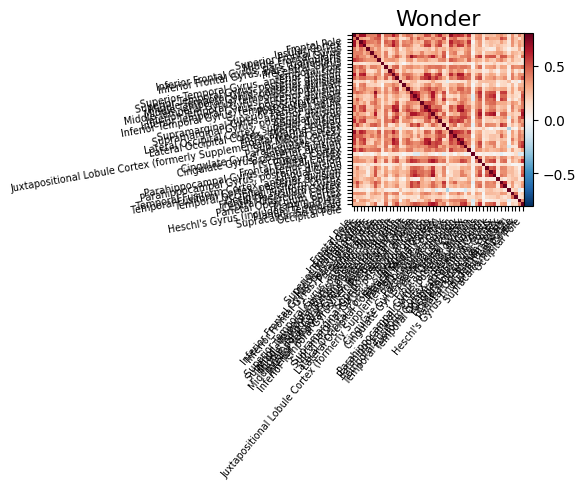

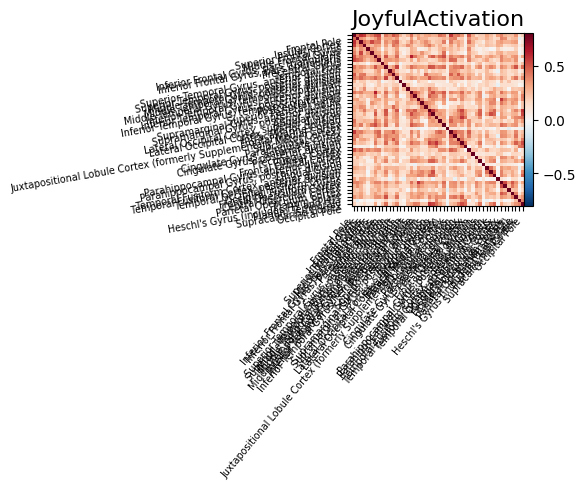

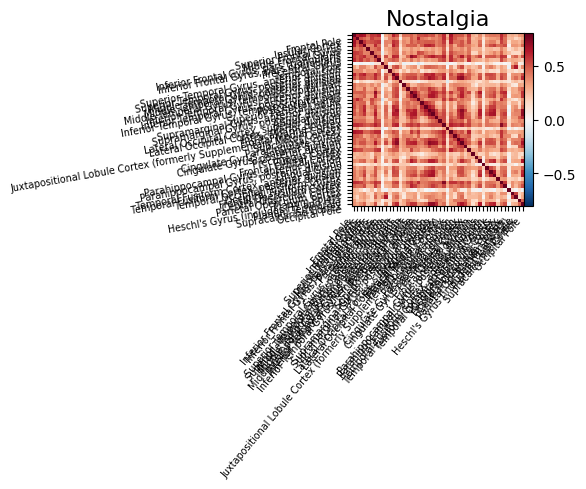

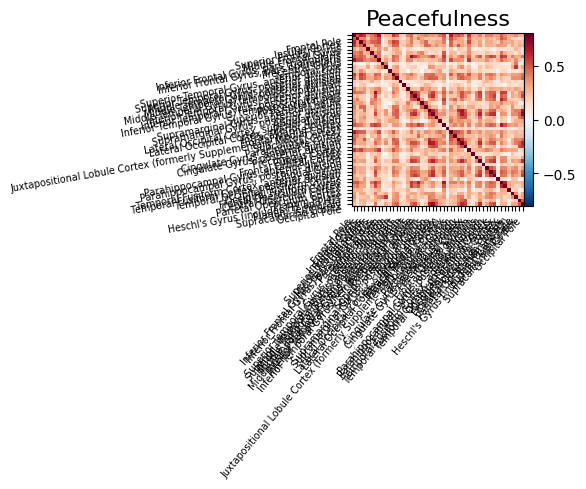

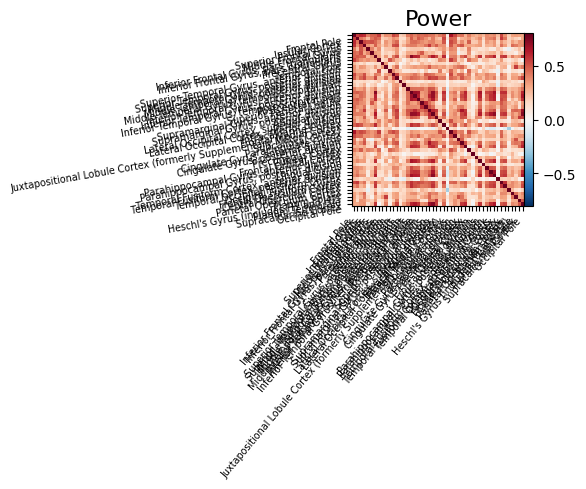

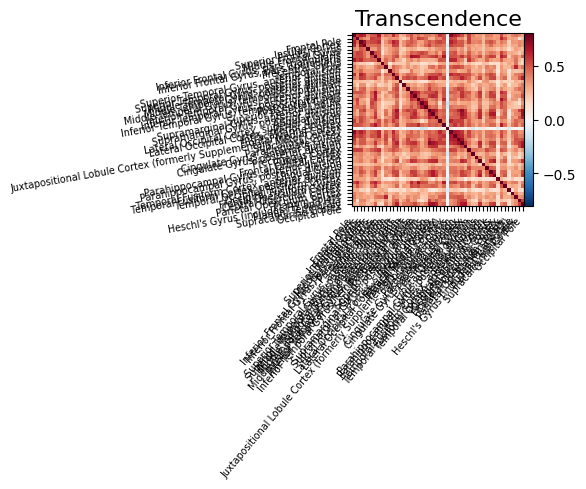

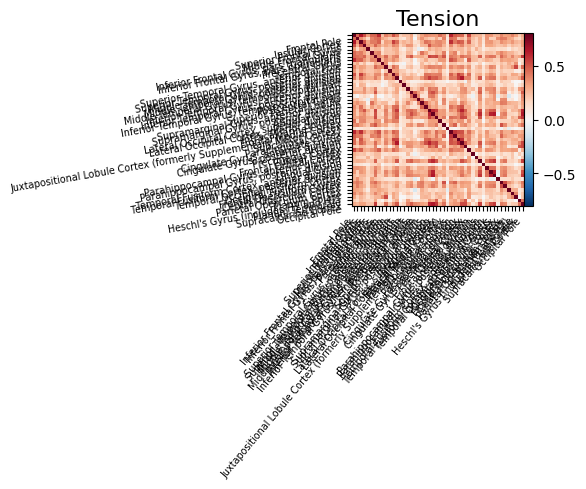

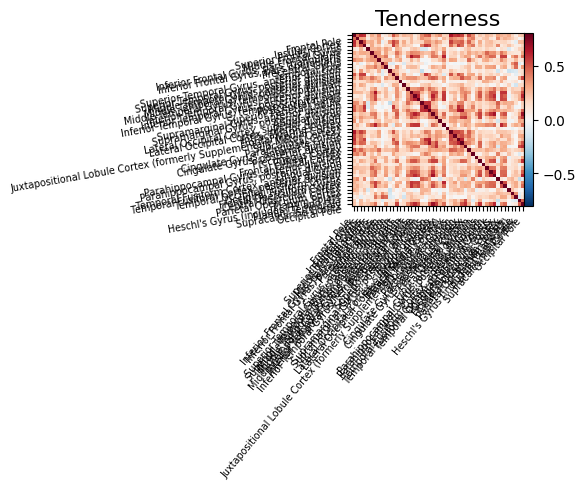

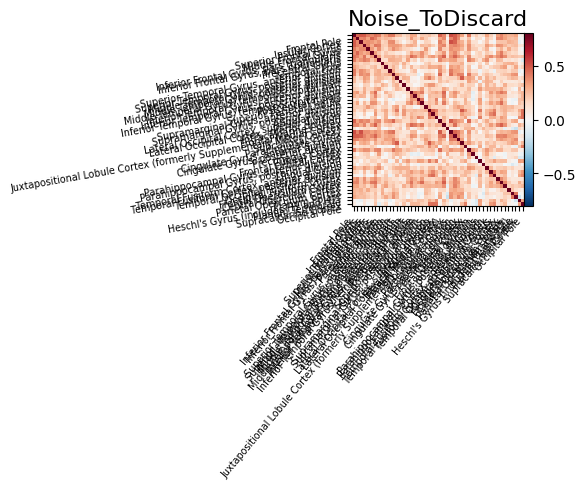

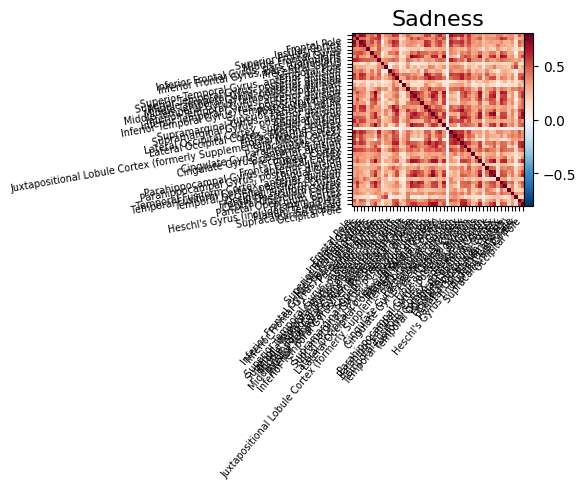

In [344]:
for target in set(target_set.values()):
    
    # print(target)

    # Normalize the correlation matrix

    # Get the number of events for the target
    counter = 0

    fl_correlation_matrix = np.zeros((number_of_regions_ho * number_of_regions_ho))

    for key, value in target_set.items():


        if value == target:
            fl_correlation_matrix += partial_correlation_matrix[key]
            counter += 1


    fl_correlation_matrix /= counter

    TwoD_correlation_matrix = fl_correlation_matrix.reshape(number_of_regions_ho, number_of_regions_ho)
    # Plot the correlation matrix
    plotting.plot_matrix(TwoD_correlation_matrix, labels=labels_ho[1:], vmax=0.8, vmin=-0.8, title=target)


    # Save the correlation matrix as a nifti file
    correlation_matrix_img = masker.inverse_transform(TwoD_correlation_matrix)

    # correlation_matrix_img.to_filename(f'correlation_matrix_{target}.nii.gz')


In [345]:
# two-factorial anova analysis
# one factor is the type of event
# the other factor is the region

# create a dataframe to store the correlation matrix
df = pd.DataFrame(partial_correlation_matrix.values())

# add the target column
df['target'] = target_set.values()

In [346]:
df.columns = [f'conn_{i}' for i in range(number_of_regions_ho * number_of_regions_ho)] + ['target']

In [347]:
# ANOVA analysis for each connection

from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

# create a dictionary to store the results
results = {}

df = df.rename(columns={0: "conn0"})

for i in range(number_of_regions_ho * number_of_regions_ho):
    
        # create the formula
        formula = f'conn_{i} ~ C(target)'
    
        # create the model
        model = ols(formula, data=df).fit()
    
        # perform the ANOVA
        aov_table = anova_lm(model, typ=2)
    
        # store the results
        results[i] = aov_table

C:\Users\sebas\AppData\Local\Temp\ipykernel_11676\1233150170.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_matrix[i,j] = results[i * number_of_regions_ho + j]['PR(>F)'][0]
C:\Users\sebas\AppData\Local\Temp\ipykernel_11676\1233150170.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results[i * number_of_regions_ho + j]['PR(>F)'][0] < 0.05:
C:\Users\sebas\AppData\Local\Temp\ipykernel_11676\1233150170.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a val

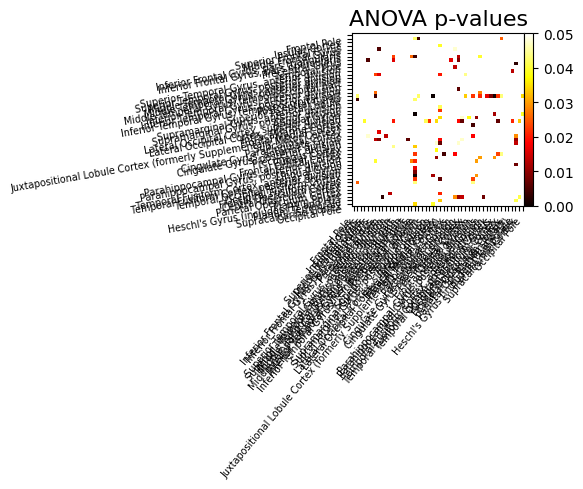

In [348]:
# transform the p-value results into a square matrix
anova_matrix = np.zeros((number_of_regions_ho, number_of_regions_ho))

for i in range(number_of_regions_ho):
    for j in range(number_of_regions_ho):
        anova_matrix[i,j] = results[i * number_of_regions_ho + j]['PR(>F)'][0]

# Plot the p-values
plotting.plot_matrix(anova_matrix, labels=labels_ho[1:], vmax=0.05, vmin=0, title='ANOVA p-values', cmap='hot')

# num of connections with p-value < 0.05
num_sig_conn = np.sum(anova_matrix < 0.05)

# conn matrix only with significant results
sig_conn_matrix = np.ones((number_of_regions_ho, number_of_regions_ho))*0.05

for i in range(number_of_regions_ho):
    for j in range(number_of_regions_ho):
        if results[i * number_of_regions_ho + j]['PR(>F)'][0] < 0.05:
            sig_conn_matrix[i,j] = results[i * number_of_regions_ho + j]['PR(>F)'][0]

In [349]:
# Get rows and columns with p-values less than 0.05
rows= []
cols = []

idx= 0

anova_1D_matrix = {}
for i in range(number_of_regions_ho):
    for j in range(number_of_regions_ho):
        if anova_matrix[i,j] < 0.01:
            rows.append(i)
            cols.append(j)
            anova_1D_matrix[idx] = anova_matrix[i,j]

            idx += 1



arr_rows = np.array(rows)
arr_cols = np.array(cols)

anova_1D_matrix = np.array(list(anova_1D_matrix.values()))


In [350]:
import mne_connectivity

from mne_connectivity.viz import plot_connectivity_circle

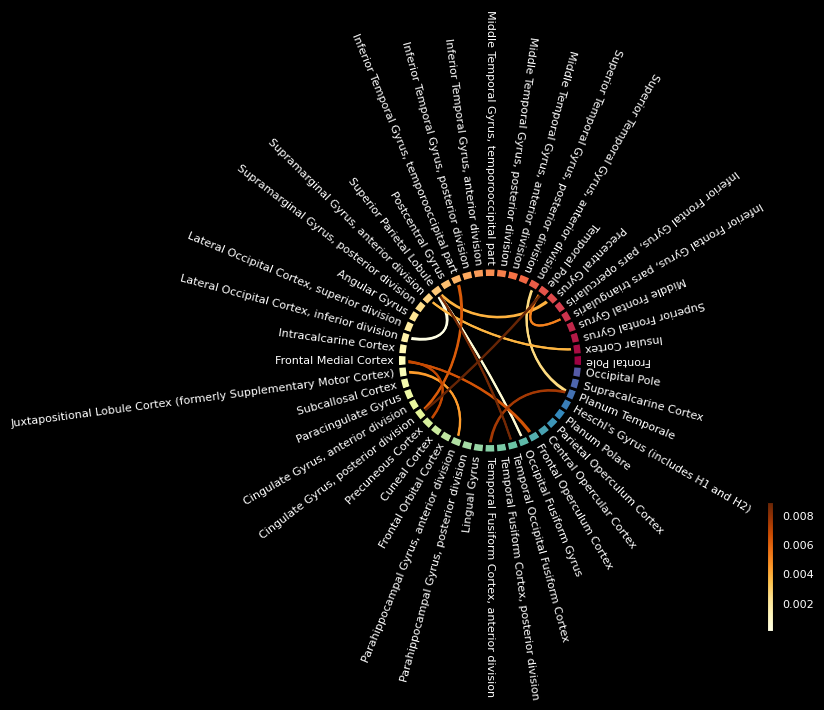

In [351]:

conn_plot=plot_connectivity_circle(anova_1D_matrix, labels_ho[1:], indices=(arr_rows, arr_cols), colormap='YlOrBr', facecolor='black', textcolor='white')


In [352]:
conn_plot[0].savefig(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-FCMVPA_anova-circle-plot.png'))